In [29]:
!pip install -q sympy
!pip install -q nbinteract

import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import nbinteract as nbi
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [30]:
from ipywidgets import interact
import nbinteract as nbi

# Supply, Demand, and Equilibrium

## Set-up

With this notebook, we are going to plot and solve equations, hopefully giving some more hands on exposure to the materials that you've already seen in class. **To get started, in the menu above, click `Cell` and select `Run All` from the drop-down menu, then you should be good to go!**

The traditional demand and supply equations follow the form $ Quantity = f(Price)$, where the quantity of a good demanded or supplied is a function of its price. An example of a demand equation (indicated by the use of $_d$'s) is below:

$$Quantity_{d}=-5 * Price_{d} + 3$$

*Note: The interpretation of this equation is that for every unit that price increases, we see a five unit decrease in the quantity demanded, meaning that there is a negative relationship between the two variables. This intuitively makes sense and is often the case for demand equations -- as a good goes up in price, all else equal, less of that product will be bought. Though there are some instances where this is not the case, and it is likely that the relationship would not follow a straight line, the general relationships and concepts are displayed with our simple case.*

In order to be able to plot with price on the y-axis and quantity on the x-axis, we need to shift around our equations. We will use the inverse-supply and inverse-demand equations, which follow the form $ Price = f(Quantity)$. Below we've taken the example demand equation from above and changed it into the inverse-demand form by solving the equation for price. It might be a good exercise to do this by hand.

$$Price_{d}=-1/5*Quantity_{d}+3/5$$

## Solving Equations with SymPy

In order to treat variables like the symbols you would using pen and paper, we have to declare them as such first. We are going to use the inverse forms, so our equations will both be a function of quantity. We create a variable for quantity below.

In [31]:
Q = sympy.Symbol("Q")

Now when we call this variable, we can see that it is a symbolic variable, and not some other Python type.

In [32]:
Q

Q

And with our symbol, we can set up simple expressions.

In [33]:
Q*Q

Q**2

In [34]:
Q*3 + 4

3*Q + 4

So we will give that expression a name, `supply`.

In [35]:
supply = 3*Q + 4
supply

3*Q + 4

We can then substitue in values for our quantity variable. We do so in the following cell. Using the method `subs`, we take the equation we already defined, `supply`, and plug in the value 3 in place of `Q`.

In [36]:
supply.subs(Q, 3)

13

Next we'll define an inverse-demand equation.

In [37]:
demand = -4*Q+15
demand

-4*Q + 15

We are now able to take our supply and demand equations and find where they intersect. When we use the `solve` function, it will tell us the x-value of the point where the two lines intercept. This is the equilibrium quantity, which we will call that value `Q_star`.

In [38]:
Q_star = solve(demand, supply) # our version of solve is simplified for single solution systems
Q_star

11/7

We can then substitute `Q_star` back into our original inverse-supply and inverse-demand equations to solve for our equilibrium price.

In [39]:
demand.subs(Q, Q_star)

61/7

In [40]:
supply.subs(Q, Q_star)

61/7

## Visualizing those supply and demand equations

(11/7, 61/7)

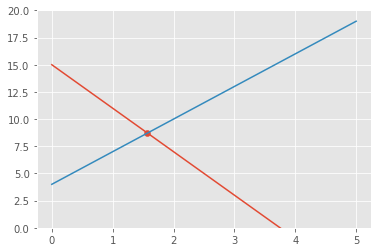

In [41]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(demand, 0, 5)
plot_equation(supply, 0, 5)
plt.ylim(0,20)
plot_intercept(supply, demand)

 *Sample question using widgets*
## A shift in the Demand Curve 
the following would be a sample of using a widget to ask a multiple choice question

In [42]:
nbi.multiple_choice(question="What can cause a rightward shift in the demand curve?",
                    choices=['The enactment of a price ceiling', 'The invention of more efficient manufacturing process', 'A change in consumer preferences'],
                    answers=2)

**Adding Sliders**
## Modeling a Shift in Demand
We would like to be able to add in the ability to shift the demand curve, using a slider

In [43]:
# need to move supply to outside of functions (for interchangability)
# add in equilibriums

def shift_demand():
    equation = demand
    def shift_helper(shift):
        plot_equation(equation, -10, 10)
        plot_equation(supply, -10, 10)
        old = plot_intercept(equation, supply)
        print('Original Intercept:', old)
        
        if shift != 0:
            plot_equation(equation + shift, -10, 10, 'shifted')
            new = plot_intercept(equation + shift, supply)
            print('New intercept:', new)
            print('Change in Quantity:', round(float(new[0]-old[0]), 2))
            print('Change in Price:', round(float(new[1]-old[1]), 2))
        else:
            print('Nothing shifted yet, use the slider to move the line!')
        plt.xlim(0,8)
        plt.ylim(0,20)
        plt.legend()
        plt.ylabel("Price")
        plt.xlabel("Quantity")
    interact(shift_helper, shift=(-6, 12, 3))

shift_demand()

interactive(children=(IntSlider(value=3, description='shift', max=12, min=-6, step=3), Output()), _dom_classes…

## Question 1.1 - Describe Demand Curve 
Please invent what good you think the Demand curve is describing 


....  Type your answer in here

## Question 1.2 - Income and Demand Shift
How would a change in income shift the demand curve 

....  Type your answer in here

## Question 1.3 - Cross Price Elasticity
How would a change in the price of a subsitute good shift the Demand Curve 

....  Type your answer in here

## Consumer and Producer Surplus

In [44]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
def Equilibrium(demandParam, supplyParam, priceStart):
    demandEquation = demandParam - p
    # change the slope
    supplyEquation = p * (supplyParam/10)
    priceEnd = sympy.solve(demandEquation)[0]
    prices = []
    demandQ = []
    supplyQ = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demandQ += [demandEquation.subs(p,price)]
        supplyQ += [supplyEquation.subs(p,price)]
    
    equilibriumP = sympy.solve(demandEquation-supplyEquation)[0]
    equilibriumQ = demandEquation.subs(p,equilibriumP)
    
    
    
    triangle1 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,priceEnd]],True,color="green")
    triangle2 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,0]],True,color="red")
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    plt.plot(demandQ,prices)
    plt.plot(supplyQ,prices)
    plt.legend(["Demand","Supply"])
    plt.plot(equilibriumQ,equilibriumP, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("The equilibrium price is "+str(round(equilibriumP,2))+" and equilibrium quantity is "+str(round(equilibriumQ,2))+".")
    print("The consumer surplus at this equilibrium "+str((priceEnd-equilibriumP)*(equilibriumQ)*.5))
    print("The producer surplus at this equilibrium "+str((equilibriumP)*(equilibriumQ)*.5))
# you can change the range here
slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=20,step=1,value=10)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
display(widgets.interactive(Equilibrium, demandParam=slider1, supplyParam=slider2, priceStart=slider3))

interactive(children=(IntSlider(value=10, description='demandParam', max=15, min=5), IntSlider(value=10, descr…

## Question 2.1 -  Demand Shift - Intercept Slider
Shift the Demand Parameter - This slider is only shifting the intercept which leads to a parrallel shift in Demand. What happens to the amount of Consumer Surplus as demand shifts out.  What happens to the ratio of Consumer Surplus to Producer Surplus

....  Type your answer in here

## Question 2.2 - Supply Shift - Slope Slider
Shift the Supply Parameter - This slider is shifting the slope which leads to a change in the steepness of the Supply curve. What happens to the amount of Consumer Surplus as supply becomes steeper?  What happens to the ratio of Consumer Surplus to Producer Surplus?

....  Type your answer in here

## Question 2.3 - 
How would a change in income affect the demand curve 

## Effects of Taxes 

In [45]:
def eqSolve(eq1,eq2,tax):
    demandP = sympy.solve(eq1-q,p)[0]
    supplyP = sympy.solve(eq2-q,p)[0]
    demandP = demandP-cTax
    supplyP = supplyP+pTax

    demandQ = sympy.solve(demandP-p,q)[0]
    supplyQ = sympy.solve(supplyP-p,q)[0]
    
    return sympy.solve((demandP-supplyP, demandQ-supplyQ,tax-cTax-pTax), q,p,cTax,pTax)[q]

In [46]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
q = sympy.Symbol("q")
cTax = sympy.Symbol("cTax")
pTax = sympy.Symbol("pTax")

def EquilibriumTax(demandParam,supplyParam,priceStart,priceEnd,tax):
    demandEquation = demandParam - p
    supplyEquation = p * (supplyParam/10)
    prices = []
    demand = []
    supply = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demand += [demandEquation.subs(p,price)]
        supply += [supplyEquation.subs(p,price)]
        
    
    
    nonTaxPrice = sympy.solve(demandEquation-supplyEquation)[0]
    nonTaxQ = demandEquation.subs(p,nonTaxPrice)

    
    equilibriumQ = eqSolve(demandEquation,supplyEquation,tax)
    equilibriumP1 = sympy.solve(demandEquation-equilibriumQ)[0]
    equilibriumP2 = sympy.solve(supplyEquation-equilibriumQ)[0]
    
    triangle1 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP1]],True,color="green")
    triangle2 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP2]],True)
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    
    rect1 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP1-nonTaxPrice,linewidth=1,facecolor="red")
    rect2 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP2-nonTaxPrice,linewidth=1,facecolor="yellow")
    currentAxis.add_patch(rect1)
    currentAxis.add_patch(rect2)
    
    plt.plot(demand,prices)
    plt.plot(supply,prices)
    
    
    plt.legend([rect1,rect2,triangle1,triangle2], ["Consumer Tax","Producer Tax","Consumer Deadweight Loss","Producer Deadweight Loss"])
    plt.plot(equilibriumQ,equilibriumP1, 'ro')
    plt.plot(equilibriumQ,equilibriumP2, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("Without Tax - the equilibrium price is "+str(round(nonTaxPrice,2))+" and equilibrium quantity is "+str(round(nonTaxQ,2)))
    print("With Tax - Price paid by consumers is "+str(equilibriumP1)+" Price received by suppliers is "+str(round(equilibriumP2,2))+" and equilibrium quantity is "+str(equilibriumQ)+".")
    print("Taxes raised from consumers equals "+str(round(equilibriumQ*(equilibriumP1-nonTaxPrice),2)))
    print("Taxes raised from producers equals "+str(round(equilibriumQ*(nonTaxPrice-equilibriumP2),2)))
    print("Total taxes raised equals "+str(equilibriumQ*tax))

slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=20,step=1,value=10)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
slider4 = widgets.IntSlider(min=5, max=20,step=1,value=10)
slider5 = widgets.IntSlider(min=0, max=8,step=1,value=4)
display(widgets.interactive(EquilibriumTax, demandParam=slider1, supplyParam=slider2, priceStart=slider3, priceEnd=slider4, tax=slider5))

interactive(children=(IntSlider(value=10, description='demandParam', max=15, min=5), IntSlider(value=10, descr…

## Shifts in Demand and Supply and Incidence of Tax
In this graph the second line with the suppply plus tax is not graphed but the new equilibrium point is. 

## Question 3.1 -  Demand Shift - Intercept Slider
Shift the Demand Parameter - This slider is only shifting the intercept which leads to a parrallel shift in Demand. What happens to the amount of tax paid  as demand shifts out.  What happens to the ratio of tax paid from Consumer Surplus to Producer Surplus?

....  Type your answer in here

## Question 3.2 - Supply Shift - Slope Slider
Shift the Supply Parameter - This slider is shifting the slope which leads to a change in the steepness of the Supply curve. What happens to the amount of Consumer Surplus as supply becomes steeper?  What happens to the tax incidence - the ratio of tax coming from Consumer Surplus vs. Producer Surplus?

....  Type your answer in here

## Question 3.3 - Tax Shift - 
Shift the Tax Parameter - This slider is increasing or decreasing the amount of tax. 

Is it affecting the slope or the intercept? 

An increase in tax leads to and increase in the price paid by consumers. In this case how much does a given tax lead to an increase in price?


When shifting the tax alone - how does the incidence of tax between producers and consumers change?



....  Type your answer in here